In [2]:
#import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import os
import pickle
import seaborn as sns
import datetime as dt
from model import StockEnv,get_scaler, play_one_episode, LinearModel, DQNAgent
from tqdm.notebook import tqdm
import pyfolio as pf
%matplotlib inline

C:\Users\User\anaconda3\envs\MyDjango\lib\site-packages\pyfolio\pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


Stock name: BP
Start: 2013-02-19 00:00:00, End: 2020-12-31 00:00:00
Training data: 1227 
Tsesting data: 756 


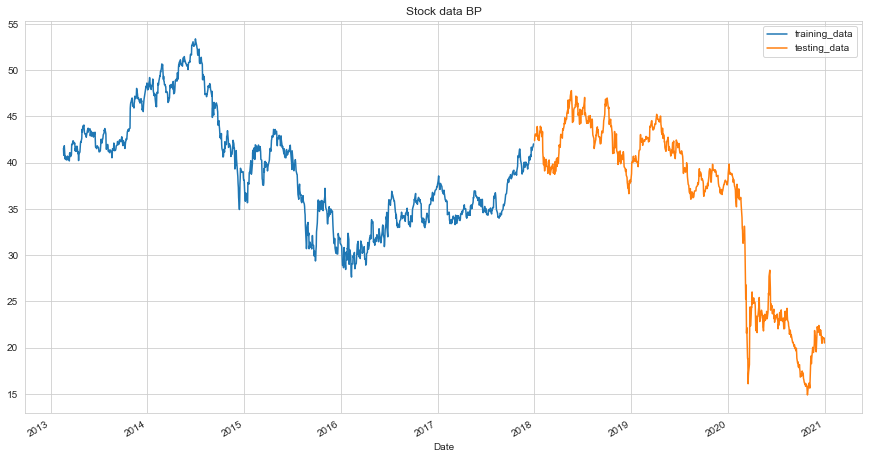

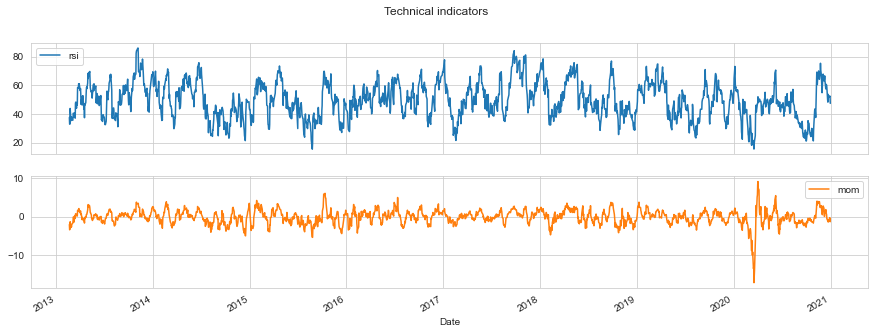

In [11]:
stock_name = 'bp'.upper()
industry = 'Energy'
stock_data = pd.read_csv(f'../train_test_data/{stock_name}.csv', index_col=['Date'], parse_dates=True)

train_data = stock_data.loc[:'2018-01-01']
test_data = stock_data.loc['2018-01-01':]

print(f'Stock name: {stock_name}')
print(f'Start: {stock_data.index[0]}, End: {stock_data.index[-1]}')
print(f'Training data: {len(train_data)} ')
print(f'Tsesting data: {len(test_data)} ')

sns.set_style('whitegrid')
train_data['Adj Close'].plot(label='training_data', figsize=(15,8));
test_data['Adj Close'].plot(label='testing_data');
plt.title('Stock data '+ stock_name)
plt.legend();
plt.show()

stock_data[['rsi', 'mom']].plot(subplots=True, figsize=(15,5), title='Technical indicators');
plt.show()




In [4]:
num_episodes = 2000
batch_size = 32
capital = 1000
data = stock_data['Adj Close'].values
n_timesteps = data.shape[0]


env = StockEnv(train_data, capital)
state_size = env.state_dim
action_size = 2
agent = DQNAgent(state_size, action_size)
scaler = get_scaler(env)

  0%|          | 0/2000 [00:00<?, ?it/s]

episode: 1/2000, episode end value: 1129.06, duration: 0:00:00.219028
episode: 2/2000, episode end value: 1098.05, duration: 0:00:00.198038
episode: 3/2000, episode end value: 1168.40, duration: 0:00:00.184388
episode: 4/2000, episode end value: 1141.77, duration: 0:00:00.188044
episode: 5/2000, episode end value: 1144.03, duration: 0:00:00.190041
episode: 6/2000, episode end value: 1054.15, duration: 0:00:00.193812
episode: 7/2000, episode end value: 1063.82, duration: 0:00:00.199043
episode: 8/2000, episode end value: 1090.02, duration: 0:00:00.201050
episode: 9/2000, episode end value: 1053.52, duration: 0:00:00.207058
episode: 10/2000, episode end value: 1091.36, duration: 0:00:00.193028
episode: 11/2000, episode end value: 1161.34, duration: 0:00:00.188040
episode: 12/2000, episode end value: 1064.94, duration: 0:00:00.192057
episode: 13/2000, episode end value: 1128.39, duration: 0:00:00.204031
episode: 14/2000, episode end value: 1099.82, duration: 0:00:00.191041
episode: 15/200

episode: 117/2000, episode end value: 1114.54, duration: 0:00:00.212048
episode: 118/2000, episode end value: 1111.92, duration: 0:00:00.221052
episode: 119/2000, episode end value: 1092.09, duration: 0:00:00.213048
episode: 120/2000, episode end value: 1091.06, duration: 0:00:00.203046
episode: 121/2000, episode end value: 1158.82, duration: 0:00:00.211048
episode: 122/2000, episode end value: 1141.42, duration: 0:00:00.218048
episode: 123/2000, episode end value: 1144.35, duration: 0:00:00.192042
episode: 124/2000, episode end value: 1145.10, duration: 0:00:00.202046
episode: 125/2000, episode end value: 1130.58, duration: 0:00:00.203047
episode: 126/2000, episode end value: 1135.29, duration: 0:00:00.210048
episode: 127/2000, episode end value: 1079.15, duration: 0:00:00.207048
episode: 128/2000, episode end value: 1158.89, duration: 0:00:00.200045
episode: 129/2000, episode end value: 1090.67, duration: 0:00:00.211047
episode: 130/2000, episode end value: 1098.31, duration: 0:00:00

episode: 231/2000, episode end value: 1085.43, duration: 0:00:00.196040
episode: 232/2000, episode end value: 1119.41, duration: 0:00:00.199054
episode: 233/2000, episode end value: 1077.92, duration: 0:00:00.198036
episode: 234/2000, episode end value: 1086.94, duration: 0:00:00.207047
episode: 235/2000, episode end value: 1139.36, duration: 0:00:00.223051
episode: 236/2000, episode end value: 1050.43, duration: 0:00:00.189042
episode: 237/2000, episode end value: 1094.32, duration: 0:00:00.200046
episode: 238/2000, episode end value: 1120.39, duration: 0:00:00.195044
episode: 239/2000, episode end value: 1095.04, duration: 0:00:00.196045
episode: 240/2000, episode end value: 1087.35, duration: 0:00:00.205046
episode: 241/2000, episode end value: 1168.65, duration: 0:00:00.209047
episode: 242/2000, episode end value: 1135.73, duration: 0:00:00.201045
episode: 243/2000, episode end value: 1109.98, duration: 0:00:00.209048
episode: 244/2000, episode end value: 1075.00, duration: 0:00:00

episode: 345/2000, episode end value: 1103.66, duration: 0:00:00.251053
episode: 346/2000, episode end value: 1131.59, duration: 0:00:00.253060
episode: 347/2000, episode end value: 1139.08, duration: 0:00:00.248054
episode: 348/2000, episode end value: 1081.95, duration: 0:00:00.249057
episode: 349/2000, episode end value: 1132.41, duration: 0:00:00.250054
episode: 350/2000, episode end value: 1095.52, duration: 0:00:00.251057
episode: 351/2000, episode end value: 1118.62, duration: 0:00:00.253057
episode: 352/2000, episode end value: 1137.91, duration: 0:00:00.250057
episode: 353/2000, episode end value: 1102.29, duration: 0:00:00.245056
episode: 354/2000, episode end value: 1089.36, duration: 0:00:00.267060
episode: 355/2000, episode end value: 1133.63, duration: 0:00:00.237052
episode: 356/2000, episode end value: 1170.69, duration: 0:00:00.249056
episode: 357/2000, episode end value: 1137.24, duration: 0:00:00.242054
episode: 358/2000, episode end value: 1154.95, duration: 0:00:00

episode: 459/2000, episode end value: 1091.66, duration: 0:00:00.340074
episode: 460/2000, episode end value: 1143.86, duration: 0:00:00.359082
episode: 461/2000, episode end value: 1099.79, duration: 0:00:00.348076
episode: 462/2000, episode end value: 1102.85, duration: 0:00:00.421092
episode: 463/2000, episode end value: 1103.88, duration: 0:00:00.374085
episode: 464/2000, episode end value: 1138.37, duration: 0:00:00.341078
episode: 465/2000, episode end value: 1125.98, duration: 0:00:00.253057
episode: 466/2000, episode end value: 1124.20, duration: 0:00:00.265573
episode: 467/2000, episode end value: 1153.72, duration: 0:00:00.279063
episode: 468/2000, episode end value: 1076.71, duration: 0:00:00.253057
episode: 469/2000, episode end value: 1122.54, duration: 0:00:00.267062
episode: 470/2000, episode end value: 1109.35, duration: 0:00:00.263065
episode: 471/2000, episode end value: 1107.06, duration: 0:00:00.261057
episode: 472/2000, episode end value: 1126.46, duration: 0:00:00

episode: 573/2000, episode end value: 1128.03, duration: 0:00:00.341078
episode: 574/2000, episode end value: 1133.61, duration: 0:00:00.296062
episode: 575/2000, episode end value: 1115.91, duration: 0:00:00.367083
episode: 576/2000, episode end value: 1081.80, duration: 0:00:00.356081
episode: 577/2000, episode end value: 1104.14, duration: 0:00:00.322074
episode: 578/2000, episode end value: 1057.29, duration: 0:00:00.316071
episode: 579/2000, episode end value: 1067.85, duration: 0:00:00.351082
episode: 580/2000, episode end value: 1088.67, duration: 0:00:00.355076
episode: 581/2000, episode end value: 1086.12, duration: 0:00:00.360083
episode: 582/2000, episode end value: 1106.12, duration: 0:00:00.384090
episode: 583/2000, episode end value: 1100.41, duration: 0:00:00.400088
episode: 584/2000, episode end value: 1110.15, duration: 0:00:00.364083
episode: 585/2000, episode end value: 1101.97, duration: 0:00:00.320075
episode: 586/2000, episode end value: 1145.01, duration: 0:00:00

episode: 687/2000, episode end value: 1133.36, duration: 0:00:00.448102
episode: 688/2000, episode end value: 1152.82, duration: 0:00:00.448102
episode: 689/2000, episode end value: 1092.99, duration: 0:00:00.352080
episode: 690/2000, episode end value: 1089.82, duration: 0:00:00.391089
episode: 691/2000, episode end value: 1135.44, duration: 0:00:00.384085
episode: 692/2000, episode end value: 1186.64, duration: 0:00:00.385087
episode: 693/2000, episode end value: 1069.17, duration: 0:00:00.395090
episode: 694/2000, episode end value: 1097.61, duration: 0:00:00.385086
episode: 695/2000, episode end value: 1132.61, duration: 0:00:00.529118
episode: 696/2000, episode end value: 1080.32, duration: 0:00:00.388088
episode: 697/2000, episode end value: 1148.56, duration: 0:00:00.409094
episode: 698/2000, episode end value: 1132.46, duration: 0:00:00.463797
episode: 699/2000, episode end value: 1084.63, duration: 0:00:00.450103
episode: 700/2000, episode end value: 1126.45, duration: 0:00:00

episode: 801/2000, episode end value: 1146.69, duration: 0:00:00.455104
episode: 802/2000, episode end value: 1160.35, duration: 0:00:00.437098
episode: 803/2000, episode end value: 1111.79, duration: 0:00:00.441102
episode: 804/2000, episode end value: 1137.39, duration: 0:00:00.412091
episode: 805/2000, episode end value: 1064.54, duration: 0:00:00.466106
episode: 806/2000, episode end value: 1057.55, duration: 0:00:00.452102
episode: 807/2000, episode end value: 1136.66, duration: 0:00:00.463105
episode: 808/2000, episode end value: 1101.40, duration: 0:00:00.463124
episode: 809/2000, episode end value: 1154.11, duration: 0:00:00.488059
episode: 810/2000, episode end value: 1092.23, duration: 0:00:00.514900
episode: 811/2000, episode end value: 1068.44, duration: 0:00:00.480110
episode: 812/2000, episode end value: 1122.43, duration: 0:00:00.433097
episode: 813/2000, episode end value: 1153.19, duration: 0:00:00.406092
episode: 814/2000, episode end value: 1073.88, duration: 0:00:00

episode: 915/2000, episode end value: 1140.15, duration: 0:00:00.418613
episode: 916/2000, episode end value: 1147.19, duration: 0:00:00.427409
episode: 917/2000, episode end value: 1078.88, duration: 0:00:00.440844
episode: 918/2000, episode end value: 1122.69, duration: 0:00:00.392544
episode: 919/2000, episode end value: 1055.75, duration: 0:00:00.384335
episode: 920/2000, episode end value: 1078.75, duration: 0:00:00.421095
episode: 921/2000, episode end value: 1143.94, duration: 0:00:00.432096
episode: 922/2000, episode end value: 1086.42, duration: 0:00:00.415089
episode: 923/2000, episode end value: 1096.23, duration: 0:00:00.431645
episode: 924/2000, episode end value: 1096.55, duration: 0:00:00.408119
episode: 925/2000, episode end value: 1086.77, duration: 0:00:00.437962
episode: 926/2000, episode end value: 1137.79, duration: 0:00:00.420178
episode: 927/2000, episode end value: 1137.60, duration: 0:00:00.419821
episode: 928/2000, episode end value: 1084.32, duration: 0:00:00

episode: 1029/2000, episode end value: 1097.86, duration: 0:00:00.385087
episode: 1030/2000, episode end value: 1081.93, duration: 0:00:00.407093
episode: 1031/2000, episode end value: 1109.47, duration: 0:00:00.419092
episode: 1032/2000, episode end value: 1079.57, duration: 0:00:00.410092
episode: 1033/2000, episode end value: 1092.61, duration: 0:00:00.430095
episode: 1034/2000, episode end value: 1082.58, duration: 0:00:00.435099
episode: 1035/2000, episode end value: 1193.49, duration: 0:00:00.459101
episode: 1036/2000, episode end value: 1189.85, duration: 0:00:00.455104
episode: 1037/2000, episode end value: 1111.06, duration: 0:00:00.499116
episode: 1038/2000, episode end value: 1139.45, duration: 0:00:00.438101
episode: 1039/2000, episode end value: 1085.71, duration: 0:00:00.358081
episode: 1040/2000, episode end value: 1151.83, duration: 0:00:00.422095
episode: 1041/2000, episode end value: 1089.14, duration: 0:00:00.363083
episode: 1042/2000, episode end value: 1120.54, dur

episode: 1142/2000, episode end value: 1095.95, duration: 0:00:00.403091
episode: 1143/2000, episode end value: 1157.38, duration: 0:00:00.366084
episode: 1144/2000, episode end value: 1122.61, duration: 0:00:00.358082
episode: 1145/2000, episode end value: 1112.78, duration: 0:00:00.418095
episode: 1146/2000, episode end value: 1183.84, duration: 0:00:00.462105
episode: 1147/2000, episode end value: 1144.99, duration: 0:00:00.362082
episode: 1148/2000, episode end value: 1187.99, duration: 0:00:00.413095
episode: 1149/2000, episode end value: 1090.06, duration: 0:00:00.417095
episode: 1150/2000, episode end value: 1100.84, duration: 0:00:00.433100
episode: 1151/2000, episode end value: 1134.65, duration: 0:00:00.456103
episode: 1152/2000, episode end value: 1129.89, duration: 0:00:00.441101
episode: 1153/2000, episode end value: 1208.83, duration: 0:00:00.486108
episode: 1154/2000, episode end value: 1074.69, duration: 0:00:00.342070
episode: 1155/2000, episode end value: 1096.55, dur

episode: 1255/2000, episode end value: 1113.59, duration: 0:00:00.420095
episode: 1256/2000, episode end value: 1090.67, duration: 0:00:00.392087
episode: 1257/2000, episode end value: 1099.90, duration: 0:00:00.393089
episode: 1258/2000, episode end value: 1091.50, duration: 0:00:00.458106
episode: 1259/2000, episode end value: 1121.92, duration: 0:00:00.414092
episode: 1260/2000, episode end value: 1106.07, duration: 0:00:00.371083
episode: 1261/2000, episode end value: 1106.74, duration: 0:00:00.451102
episode: 1262/2000, episode end value: 1194.69, duration: 0:00:00.390090
episode: 1263/2000, episode end value: 1139.26, duration: 0:00:00.399090
episode: 1264/2000, episode end value: 1121.85, duration: 0:00:00.373085
episode: 1265/2000, episode end value: 1105.10, duration: 0:00:00.335083
episode: 1266/2000, episode end value: 1109.95, duration: 0:00:00.415092
episode: 1267/2000, episode end value: 1100.14, duration: 0:00:00.410092
episode: 1268/2000, episode end value: 1120.17, dur

episode: 1368/2000, episode end value: 1088.78, duration: 0:00:00.385726
episode: 1369/2000, episode end value: 1058.66, duration: 0:00:00.446691
episode: 1370/2000, episode end value: 1080.22, duration: 0:00:00.417234
episode: 1371/2000, episode end value: 1079.73, duration: 0:00:00.409091
episode: 1372/2000, episode end value: 1088.57, duration: 0:00:00.416095
episode: 1373/2000, episode end value: 1129.00, duration: 0:00:00.439099
episode: 1374/2000, episode end value: 1213.99, duration: 0:00:00.407092
episode: 1375/2000, episode end value: 1075.95, duration: 0:00:00.460103
episode: 1376/2000, episode end value: 1068.03, duration: 0:00:00.380088
episode: 1377/2000, episode end value: 1143.12, duration: 0:00:00.398603
episode: 1378/2000, episode end value: 1079.56, duration: 0:00:00.367021
episode: 1379/2000, episode end value: 1045.12, duration: 0:00:00.396646
episode: 1380/2000, episode end value: 1092.01, duration: 0:00:00.360083
episode: 1381/2000, episode end value: 1150.20, dur

episode: 1481/2000, episode end value: 1055.79, duration: 0:00:00.410094
episode: 1482/2000, episode end value: 1144.14, duration: 0:00:00.421095
episode: 1483/2000, episode end value: 1076.46, duration: 0:00:00.403091
episode: 1484/2000, episode end value: 1135.08, duration: 0:00:00.376089
episode: 1485/2000, episode end value: 1124.99, duration: 0:00:00.409089
episode: 1486/2000, episode end value: 1097.92, duration: 0:00:00.423096
episode: 1487/2000, episode end value: 1108.85, duration: 0:00:00.383088
episode: 1488/2000, episode end value: 1093.18, duration: 0:00:00.396088
episode: 1489/2000, episode end value: 1095.24, duration: 0:00:00.418094
episode: 1490/2000, episode end value: 1053.81, duration: 0:00:00.361088
episode: 1491/2000, episode end value: 1079.64, duration: 0:00:00.398091
episode: 1492/2000, episode end value: 1042.37, duration: 0:00:00.397085
episode: 1493/2000, episode end value: 1110.16, duration: 0:00:00.406093
episode: 1494/2000, episode end value: 1070.86, dur

episode: 1594/2000, episode end value: 1147.72, duration: 0:00:00.357081
episode: 1595/2000, episode end value: 1117.89, duration: 0:00:00.395091
episode: 1596/2000, episode end value: 1121.71, duration: 0:00:00.440097
episode: 1597/2000, episode end value: 1084.10, duration: 0:00:00.414095
episode: 1598/2000, episode end value: 1143.43, duration: 0:00:00.404091
episode: 1599/2000, episode end value: 1116.71, duration: 0:00:00.389090
episode: 1600/2000, episode end value: 1085.83, duration: 0:00:00.438099
episode: 1601/2000, episode end value: 1045.09, duration: 0:00:00.400090
episode: 1602/2000, episode end value: 1103.86, duration: 0:00:00.383088
episode: 1603/2000, episode end value: 1075.57, duration: 0:00:00.362084
episode: 1604/2000, episode end value: 1084.51, duration: 0:00:00.422097
episode: 1605/2000, episode end value: 1073.36, duration: 0:00:00.378084
episode: 1606/2000, episode end value: 1114.99, duration: 0:00:00.376084
episode: 1607/2000, episode end value: 1062.68, dur

episode: 1707/2000, episode end value: 1093.92, duration: 0:00:00.421099
episode: 1708/2000, episode end value: 1061.38, duration: 0:00:00.450101
episode: 1709/2000, episode end value: 1142.79, duration: 0:00:00.430101
episode: 1710/2000, episode end value: 1099.63, duration: 0:00:00.431098
episode: 1711/2000, episode end value: 1204.00, duration: 0:00:00.441098
episode: 1712/2000, episode end value: 1100.06, duration: 0:00:00.478108
episode: 1713/2000, episode end value: 1152.13, duration: 0:00:00.441097
episode: 1714/2000, episode end value: 1075.81, duration: 0:00:00.395096
episode: 1715/2000, episode end value: 1079.04, duration: 0:00:00.452101
episode: 1716/2000, episode end value: 1119.63, duration: 0:00:00.419093
episode: 1717/2000, episode end value: 1141.04, duration: 0:00:00.351079
episode: 1718/2000, episode end value: 1168.23, duration: 0:00:00.410091
episode: 1719/2000, episode end value: 1180.14, duration: 0:00:00.366086
episode: 1720/2000, episode end value: 1072.81, dur

episode: 1820/2000, episode end value: 1091.85, duration: 0:00:00.389090
episode: 1821/2000, episode end value: 1115.31, duration: 0:00:00.429097
episode: 1822/2000, episode end value: 1078.05, duration: 0:00:00.452102
episode: 1823/2000, episode end value: 1127.12, duration: 0:00:00.378085
episode: 1824/2000, episode end value: 1156.57, duration: 0:00:00.381085
episode: 1825/2000, episode end value: 1156.72, duration: 0:00:00.420096
episode: 1826/2000, episode end value: 1109.59, duration: 0:00:00.400091
episode: 1827/2000, episode end value: 1065.36, duration: 0:00:00.409091
episode: 1828/2000, episode end value: 1066.71, duration: 0:00:00.404093
episode: 1829/2000, episode end value: 1071.59, duration: 0:00:00.441767
episode: 1830/2000, episode end value: 1079.34, duration: 0:00:00.408092
episode: 1831/2000, episode end value: 1094.29, duration: 0:00:00.435096
episode: 1832/2000, episode end value: 1090.77, duration: 0:00:00.541666
episode: 1833/2000, episode end value: 1089.98, dur

episode: 1933/2000, episode end value: 1094.79, duration: 0:00:00.432101
episode: 1934/2000, episode end value: 1162.91, duration: 0:00:00.402088
episode: 1935/2000, episode end value: 1081.52, duration: 0:00:00.409092
episode: 1936/2000, episode end value: 1120.62, duration: 0:00:00.366085
episode: 1937/2000, episode end value: 1086.55, duration: 0:00:00.404090
episode: 1938/2000, episode end value: 1071.19, duration: 0:00:00.407092
episode: 1939/2000, episode end value: 1100.44, duration: 0:00:00.355081
episode: 1940/2000, episode end value: 1189.73, duration: 0:00:00.353080
episode: 1941/2000, episode end value: 1071.15, duration: 0:00:00.373089
episode: 1942/2000, episode end value: 1086.19, duration: 0:00:00.419091
episode: 1943/2000, episode end value: 1092.57, duration: 0:00:00.364078
episode: 1944/2000, episode end value: 1120.47, duration: 0:00:00.381087
episode: 1945/2000, episode end value: 1137.38, duration: 0:00:00.394087
episode: 1946/2000, episode end value: 1079.66, dur

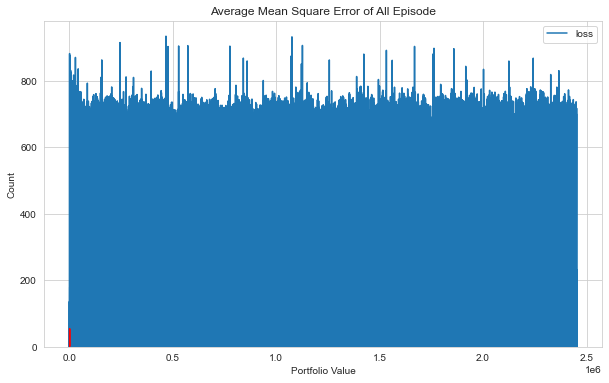

In [5]:
#train


mode = 'train'

portfolio_value = []



for e in tqdm(range(num_episodes)):
    t0 = datetime.now()
    val = play_one_episode(agent, env, mode, scaler)
    dt = datetime.now() - t0
    print(f"episode: {e + 1}/{num_episodes}, episode end value: {val['portfolio_value'][-1]:.2f}, duration: {dt}")
    portfolio_value.append(val['portfolio_value'][-1]) 


if mode == 'train':
    # save the DQN
    agent.save(f'state_dict/{stock_name}.npz')

    # save the scaler
    with open(f'scaler/{stock_name}.pkl', 'wb') as f:
        pickle.dump(scaler, f)

    # plot losses
    loss = agent.model.losses
    losses = pd.DataFrame(loss, columns=['loss'])
    losses.plot(figsize=(10,6))
    plt.title('Average Mean Square Error of All Episode')
    plt.xlabel('Step')
    plt.ylabel('Mean Square Error')

print(f'average reward: {np.mean(portfolio_value):.2f}, min: {np.min(portfolio_value):.2f}, max: {np.max(portfolio_value):.2f}')
sns.histplot(portfolio_value, bins=100, color='r', kde=True);
plt.xlabel('Portfolio Value');
plt.ylabel('Count');

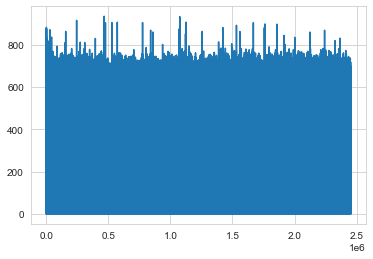

In [6]:
plt.plot(agent.model.losses)

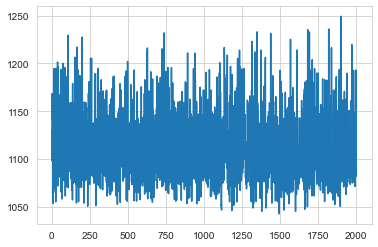

In [7]:
plt.plot(portfolio_value)

episode end value: 816.57, duration: 0:00:00.145032
Sell: 94 times, Buy: 129 times


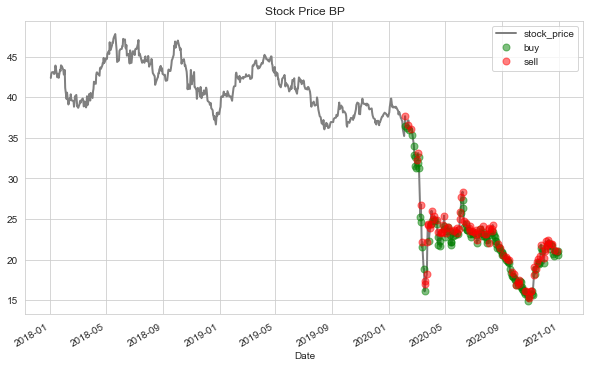

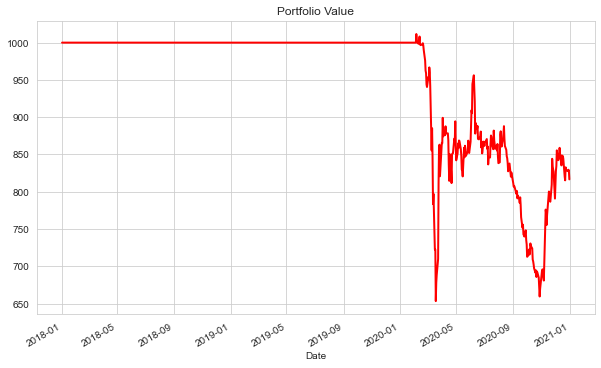

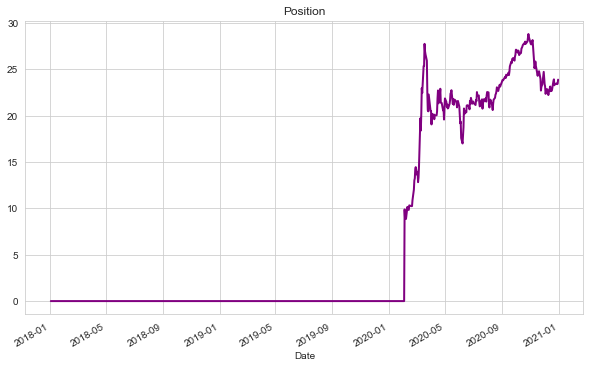

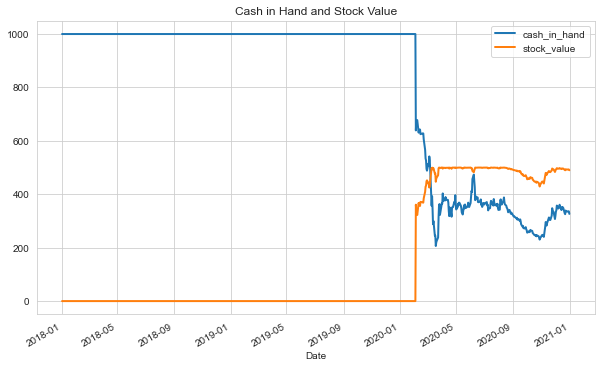

In [8]:
#test

mode = 'test'

portfolio_value = []


with open(f'scaler/{stock_name}.pkl', 'rb') as f:
    scaler = pickle.load(f)
    
env = StockEnv(test_data, capital)
agent.epsilon = 0
agent.load(f'state_dict/{stock_name}.npz')



t0 = datetime.now()
val = play_one_episode(agent, env, mode, scaler)
dt = datetime.now() - t0
print(f"episode end value: {val['portfolio_value'][-1]:.2f}, duration: {dt}")
portfolio_value.append(val['portfolio_value'][-1])
    
print(f"Sell: {env.sell_buy.count('sell')} times, Buy: {env.sell_buy.count('buy')} times")



result = pd.DataFrame(val)
result.index = test_data.index

def marker_buy(col):
    price = col[0] 
    sellbuy = col[1]
    
    if sellbuy == 'buy':
        return price
    else:
        return np.nan
    
def marker_sell(col):
    price = col[0] 
    sellbuy = col[1]
    
    if sellbuy == 'sell':
        return price
    else:
        return np.nan
    
result['marker_buy'] = result[['stock_price', 'sell_buy']].apply(marker_buy, axis=1);
result['marker_sell'] = result[['stock_price', 'sell_buy']].apply(marker_sell, axis=1);

result['stock_price'].plot(figsize=(10,6), c='grey', lw=2);
result['marker_buy'].plot(style='o', ms=7, label='buy', c='g', alpha=0.5);
result['marker_sell'].plot(style='o', ms=7, label='sell', c='r', alpha=0.5);
plt.title('Stock Price '+ stock_name)
plt.legend();
plt.show()



result['portfolio_value'].plot(figsize=(10,6), c='r', lw=2);
plt.title('Portfolio Value');
plt.show()

result['stock_owned'].plot(figsize=(10,6), c='purple', lw=2);
plt.title('Position')
plt.show()

result[['cash_in_hand', 'stock_value']].plot(figsize=(10,6), lw=2);
plt.title('Cash in Hand and Stock Value');
plt.show()

In [9]:


def CAGR(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    
    df['cumulative_ret'] = (1 + df['daily_ret']).cumprod()
    n = len(df)/252
    cagr = (df['cumulative_ret'][-1])**(1/n) - 1
    return cagr

def volatility(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    vol = df['daily_ret'].std() * np.sqrt(252)
    return vol


def sharpe(DF, rf):
    df = DF.copy()
    sr = (CAGR(df) - rf)/volatility(df)
    return sr

def max_dd(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    df['cumulative_ret'] = (1 + df['daily_ret']).cumprod()
    df['cum_roll_max'] = df['cumulative_ret'].cummax()
    df['drawdown'] = df['cum_roll_max'] - df['cumulative_ret']
    df['drawdown_pct'] = df['drawdown']/df['cum_roll_max']
    max_dd = df['drawdown_pct'].max()
    return max_dd

def calmer(DF):
    df = DF.copy()
    clmr = CAGR(df)/max_dd(df)
    return clmr



print(f'Stock name: {stock_name}')
print(f'Start: {result.index[0]}  End: {result.index[-1]}')
print(f'Compound Annual Growth Rate: {CAGR(result)*100:.2f} %')
print(f'Volatility: {volatility(result):.4f}')
print(f'shape ratio: {sharpe(result, 0.011):.4f}')
print(f'Maximun drawdown: {max_dd(result)*-100:.2f} %')
print(f'Calmar ratio: {calmer(result):.4f}')
print('-----------------------------------------------------------')
print('-----------------------------------------------------------')
print('Comparing with Adj close')
print(f'Compound Annual Growth Rate (Adj close): {CAGR(test_data)*100:.2f} %')
print(f'Volatility (benchmark): {volatility(test_data):.4f}')
print(f'shape ratio: {sharpe(test_data, 0.011):.4f}')
print(f'Maximun drawdown: {max_dd(test_data)*-100:.2f} %')
print(f'Calmar ratio (benchmark): {calmer(test_data):.4f}')

Stock name: BP
Start: 2018-01-02 00:00:00  End: 2020-12-31 00:00:00
Compound Annual Growth Rate: -6.53 %
Volatility: 0.2105
shape ratio: -0.3625
Maximun drawdown: -35.42 %
Calmar ratio: -0.1844
-----------------------------------------------------------
-----------------------------------------------------------
Comparing with Adj close
Compound Annual Growth Rate (Adj close): -21.48 %
Volatility (benchmark): 0.3909
shape ratio: -0.5775
Maximun drawdown: -68.82 %
Calmar ratio (benchmark): -0.3120


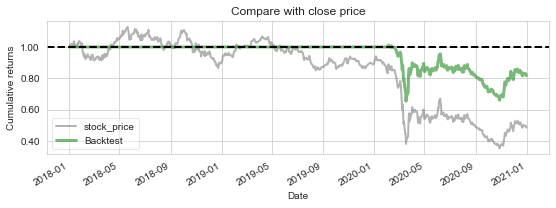

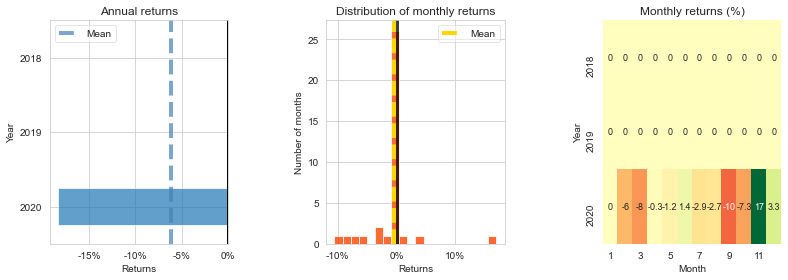

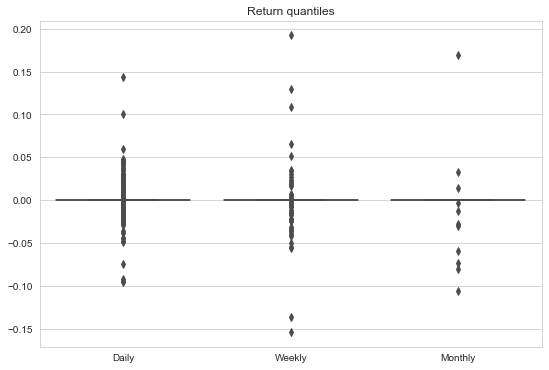

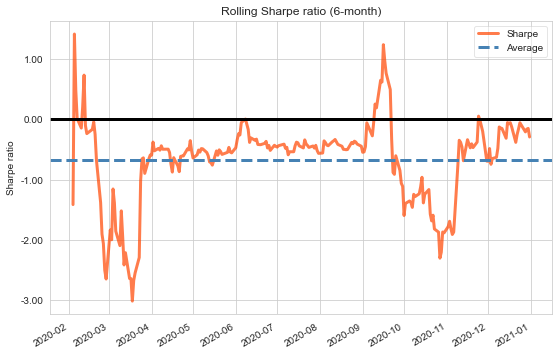

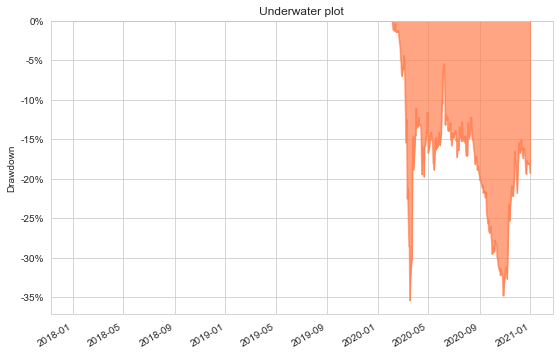

In [12]:


bt_returns = result['portfolio_value'].pct_change()
price = result['stock_price'].pct_change()



plt.figure(figsize=(9,6));
plt.subplot(2,1,1);
pf.plotting.plot_rolling_returns(bt_returns, price);
plt.title('Compare with close price');
plt.show()

fig = plt.figure(1)
plt.subplot(1,3,1)
pf.plot_annual_returns(bt_returns)
plt.subplot(1,3,2)
pf.plot_monthly_returns_dist(bt_returns)
plt.subplot(1,3,3)
pf.plot_monthly_returns_heatmap(bt_returns)
plt.tight_layout()
fig.set_size_inches(12,4)

plt.figure(figsize=(9,6))
pf.plot_return_quantiles(bt_returns);



plt.figure(figsize=(9,6))
pf.plot_rolling_sharpe(bt_returns);

plt.figure(figsize=(9,6))
pf.plot_drawdown_underwater(bt_returns);

score = (sharpe(result, 0.011) - sharpe(test_data, 0.011))*10
ret = ((result['portfolio_value'][-1] - result['portfolio_value'][0])/result['portfolio_value'][0]) * 100
with open(f'score/{stock_name}.pkl', 'wb') as f:  # Python 3: open(..., 'wb')
    pickle.dump([stock_name, industry,score, ret], f)
    
    
result.to_csv(f'../data/{stock_name}.csv')